In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import datetime as dt
from pybaseball import statcast, batting_stats_range, batting_stats, statcast_pitcher,playerid_lookup,statcast_batter
import plotly.express as px
import plotly.graph_objects as go

In [3]:
#bring in statcast pitching data for 2019
# data = statcast('2019-03-20', '2019-09-29')


In [4]:
# statcast_19 = pd.DataFrame(data)
# print(statcast_19.shape)

In [5]:
#send new complete 2019 statcast data to csv file 
# statcast_19.to_csv("Data/statcast_2019.csv", index=False)

In [6]:
#bring in player specific data for Jose Altuve, need to lookup his MLB player ID
playerid_lookup('altuve', 'jose')

Gathering player lookup table. This may take a moment.


,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last
0,altuve,jose,514888,altuj001,altuvjo01,5417,2011.0,2020.0


In [7]:
#bring in player for Yu Darvish, need to look up his MLB Player ID
playerid_lookup('darvish', 'yu')

Gathering player lookup table. This may take a moment.


,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last
0,darvish,yu,506433,darvy001,darviyu01,13074,2012.0,2020.0


In [8]:
#bring in pitch and batting specific data for Darvish and Altuve for 2019
altuve_stats19 = statcast_batter('2019-03-20', '2019-09-29', 514888)
darvish_stats19 = statcast_pitcher('2019-03-20', '2019-09-29',506433)


Gathering Player Data
Gathering Player Data


In [54]:
#bring in pitch and batting specific data for Darvish and Altuve for 2020 YTD
altuve_stats20 = statcast_batter('2020-07-20', '2020-09-08', 514888)
darvish_stats20 = statcast_pitcher('2020-07-20', '2020-09-08',506433)


Gathering Player Data
Gathering Player Data


In [101]:
#lets pull in all of YU data since 2016
darvish_data = statcast_pitcher('2016-04-01', '2020-09-08', player_id = 506433)

Gathering Player Data


In [102]:
darvish_data.shape

(9318, 89)

In [9]:
#review column data
darvish_stats19.columns

Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2', 'umpire', 'sv_id',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'pitcher.1',
       'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',
       'estima

In [10]:
darvish_stats19.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
release_speed,2848.0,88.329424,5.603706,63.60,84.50,88.30,93.30,98.70
release_pos_x,2848.0,-2.246018,0.249319,-3.00,-2.42,-2.24,-2.07,-1.37
release_pos_z,2848.0,5.602226,0.160040,5.12,5.50,5.60,5.72,6.05
batter,2848.0,565591.122893,70079.090842,425783.00,516770.00,572816.00,621111.00,670950.00
pitcher,2848.0,506433.000000,0.000000,506433.00,506433.00,506433.00,506433.00,506433.00
...,...,...,...,...,...,...,...,...
fld_score,2848.0,1.568469,1.769135,0.00,0.00,1.00,3.00,7.00
post_away_score,2848.0,1.587781,1.689661,0.00,0.00,1.00,3.00,7.00
post_home_score,2848.0,1.058287,1.459718,0.00,0.00,1.00,2.00,7.00
post_bat_score,2848.0,1.077598,1.369528,0.00,0.00,1.00,2.00,6.00


In [11]:
#verify categories within description to filter for, will use "swinging_strike"
darvish_stats19['description'].unique()

array(['hit_into_play_score', 'ball', 'swinging_strike',
       'hit_into_play_no_out', 'foul', 'hit_into_play', 'foul_tip',
       'called_strike', 'blocked_ball', 'swinging_strike_blocked',
       'foul_bunt', 'hit_by_pitch', 'missed_bunt', 'bunt_foul_tip'],
      dtype=object)

In [48]:
darvish_stats19['events'].unique()

array(['double', nan, 'single', 'sac_fly', 'triple', 'field_out',
       'strikeout', 'grounded_into_double_play', 'home_run', 'walk',
       'sac_bunt', 'field_error', 'force_out', 'hit_by_pitch',
       'fielders_choice', 'fielders_choice_out'], dtype=object)

In [56]:
#filter data to only give pitches that resulted in 'swinging_strike' 2019
darvish_swingstrikes_19 = darvish_stats19[darvish_stats19['description'].str.contains("swinging")]
darvish_swingstrikes_19 = darvish_stats19[darvish_stats19['description'].str.contains("swinging")]

#filter data to only give pitches that resulted in 'swinging_strike' 2020
darvish_swingstrikes_20 = darvish_stats20[darvish_stats20['description'].str.contains("swinging")]
darvish_swingstrikes_20 = darvish_stats20[darvish_stats20['description'].str.contains("swinging")]

In [13]:
darvish_swingstrikes_19.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
release_speed,384.0,87.927865,5.056710,67.60,84.90,87.550,91.75,97.80
release_pos_x,384.0,-2.225729,0.263009,-3.00,-2.43,-2.215,-2.01,-1.46
release_pos_z,384.0,5.606484,0.160597,5.19,5.50,5.610,5.72,6.03
batter,384.0,566790.075521,69823.691591,425783.00,518626.00,572893.500,621361.25,670950.00
pitcher,384.0,506433.000000,0.000000,506433.00,506433.00,506433.000,506433.00,506433.00
...,...,...,...,...,...,...,...,...
fld_score,384.0,1.533854,1.765317,0.00,0.00,1.000,2.00,7.00
post_away_score,384.0,1.630208,1.697402,0.00,0.00,1.000,3.00,7.00
post_home_score,384.0,1.005208,1.425238,0.00,0.00,0.000,1.00,7.00
post_bat_score,384.0,1.101562,1.377779,0.00,0.00,1.000,2.00,6.00


In [106]:
#create different DFs 
zone_analysis_columns = ['pitch_type', 'release_speed', 'release_spin_rate', 'release_extension', 'zone', 'launch_speed','launch_angle', 'launch_speed_angle', 'events']
graph_analysis_columns = ['pitch_type','plate_x','plate_z', 'release_speed', 'release_spin_rate', 'release_extension', 'zone', 'launch_speed','launch_angle', 'launch_speed_angle', 'events']

yu_columns = ['game_date','pitch_type', 'release_speed', 'release_spin_rate', 'release_extension', 'zone', 'launch_speed','launch_angle', 'launch_speed_angle', 'events']
# strike_zone = ["zone", 'plate_x']

In [64]:
#create new Data Frames
darvish_swingstrikes_19_clean = darvish_swingstrikes_19[zone_analysis_columns]
darvish_swingstrikes_19_graph = darvish_swingstrikes_19[graph_analysis_columns]
# statcast_zone = darvish_swingstrikes_19[strike_zone]

In [68]:
#create new Data Frames for 2020
darvish_swingstrikes_20_clean = darvish_swingstrikes_20[zone_analysis_columns]
darvish_swingstrikes_20_graph = darvish_swingstrikes_20[graph_analysis_columns]

In [107]:
#create a new Data Frame for all Yu data since 2016
darvish_data_clean = darvish_data[yu_columns]

In [149]:
darvish_data_clean.shape
# darvish_data_clean.head()

(9318, 11)

In [156]:
darvish_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
release_speed,9294.0,88.765376,6.325122,60.00,84.30,90.10,94.00,98.80
release_pos_x,9301.0,-2.496695,0.405015,-3.61,-2.81,-2.50,-2.19,-1.23
release_pos_z,9301.0,5.634799,0.186182,4.84,5.52,5.65,5.77,6.66
batter,9318.0,541425.132432,72709.951619,136860.00,485567.00,543760.00,596748.00,673451.00
pitcher,9318.0,506433.000000,0.000000,506433.00,506433.00,506433.00,506433.00,506433.00
...,...,...,...,...,...,...,...,...
fld_score,9318.0,1.463833,1.732556,0.00,0.00,1.00,2.00,8.00
post_away_score,9318.0,1.381305,1.505819,0.00,0.00,1.00,2.00,8.00
post_home_score,9318.0,1.058489,1.541634,0.00,0.00,0.00,2.00,8.00
post_bat_score,9318.0,0.975961,1.255176,0.00,0.00,0.00,2.00,7.00


In [114]:
darvish_data_clean.dtypes

game_date              object
pitch_type             object
release_speed         float64
release_spin_rate     float64
release_extension     float64
zone                  float64
launch_speed          float64
launch_angle          float64
launch_speed_angle    float64
events                 object
dtype: object

In [118]:
#convert game_date column to datetime
darvish_data_clean['game_date']= pd.to_datetime(darvish_data_clean['game_date']) 

C:\Users\omarc\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [121]:
darvish_data_clean.dtypes

game_date             datetime64[ns]
pitch_type                    object
release_speed                float64
release_spin_rate            float64
release_extension            float64
zone                         float64
launch_speed                 float64
launch_angle                 float64
launch_speed_angle           float64
events                        object
dtype: object

In [140]:
# .map(lambda x: x.year)
# df['year'] = df['ArrivalDate'].dt.year
darvish_data_clean['Year'] = darvish_data_clean['game_date'].dt.year

C:\Users\omarc\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [141]:
darvish_data_clean.head()

,game_date,pitch_type,release_speed,release_spin_rate,release_extension,zone,launch_speed,launch_angle,launch_speed_angle,events,Year
0,2020-09-04,FF,96.6,2752.0,6.5,1.0,NaN,NaN,NaN,strikeout,2020
1,2020-09-04,SI,95.8,2702.0,6.4,6.0,NaN,NaN,NaN,NaN,2020
2,2020-09-04,SI,92.7,1852.0,6.6,11.0,NaN,NaN,NaN,NaN,2020
3,2020-09-04,FS,88.5,1719.0,6.7,13.0,66.8,-40.0,NaN,NaN,2020
4,2020-09-04,FC,87.1,2837.0,6.5,7.0,NaN,NaN,NaN,NaN,2020


In [164]:
#lets look at the data for strikeouts by pitch
darvish_data_strikeouts = darvish_data_clean.loc[darvish_data_clean['events']=='strikeout']

In [173]:
strikeouts = darvish_data_clean.loc[darvish_data_clean['events']=='strikeout']

In [174]:
print(len(strikeouts))

699


In [175]:
darvish_data_strikeouts.describe()

,release_speed,release_spin_rate,release_extension,zone,launch_speed,launch_angle,launch_speed_angle,Year
count,698.000000,655.000000,697.000000,698.000000,0.0,0.0,0.0,699.000000
mean,87.830086,2487.832061,6.115352,8.825215,NaN,NaN,NaN,2017.799714
std,7.041845,411.298127,0.414718,4.364109,NaN,NaN,NaN,1.322041
min,63.400000,605.000000,4.700000,1.000000,NaN,NaN,NaN,2016.000000
25%,83.500000,2487.500000,5.800000,5.000000,NaN,NaN,NaN,2017.000000
50%,87.700000,2592.000000,6.100000,9.000000,NaN,NaN,NaN,2017.000000
75%,94.900000,2697.000000,6.500000,13.000000,NaN,NaN,NaN,2019.000000
max,98.600000,3168.000000,7.100000,14.000000,NaN,NaN,NaN,2020.000000


In [ ]:

# fig = px.bar(darvish_data_clean, x="Year", y="count", color="medal", title="Long-Form Input")
# fig.show()

In [182]:
#create new data frames for analysis of total pitches & strikeouts
darvish_pitches = pd.DataFrame(darvish_data_clean.groupby(["Year","pitch_type"])['release_speed'].count()).reset_index()
darvish_so_pitches = pd.DataFrame(darvish_data_strikeouts.groupby(["Year","pitch_type"])['release_speed'].count()).reset_index()


In [183]:
# darvish_pitches.head()
darvish_so_pitches.head()

,Year,pitch_type,release_speed
0,2016,CU,16
1,2016,FC,7
2,2016,FF,51
3,2016,FS,1
4,2016,FT,8


In [184]:
#rename the release_speed column to #pitches
darvish_pitches.rename(columns={'release_speed':'#Pitches'}, inplace=True)
darvish_so_pitches.rename(columns={'release_speed':'#Ks'}, inplace=True)
darvish_so_pitches.head()

,Year,pitch_type,#Ks
0,2016,CU,16
1,2016,FC,7
2,2016,FF,51
3,2016,FS,1
4,2016,FT,8


In [192]:
fig = px.bar(darvish_pitches, x="Year", y="#Pitches", color="pitch_type", title="Darvish Pitch Arsenal")
fig.show()
fig.write_html("Images/darvish_pitches.html")

In [193]:
fig1 = px.bar(darvish_so_pitches, x="Year", y="#Ks", color="pitch_type", title="Darvish Strikeouts by Pitch")
fig1.show()
fig1.write_html("Images/darvish_so_pitches.html")

In [197]:
fig2 = go.Figure(go.Histogram2dContour(
        x = darvish_data_strikeouts['release_spin_rate'],
        y = darvish_data_strikeouts['release_speed'],
        colorscale = 'Blues'
))

fig2.update_layout(title= "#Yu Darvish Strikeouts 2016 to YTD" + "<br> Release Speed vs. Spin Rate")
fig2.update_layout(xaxis_title="Spin Rate",
    yaxis_title="Release Speed")
fig2.show()

In [150]:
darvish_pitches.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,38.0,2018.105263,1.429222,2016.0,2017.0,2018.0,2019.00,2020.0
release_speed,38.0,244.552632,296.220945,1.0,35.5,129.5,337.75,1128.0


In [65]:
darvish_swingstrikes_19_clean.shape

(384, 9)

In [69]:
darvish_swingstrikes_20_clean.shape

(118, 9)

In [66]:
# statcast_zone.head()

In [105]:
#look at pitches thrown by Yu by pitch type
darvish_data_clean.groupby('pitch_type')['release_speed'].count()

pitch_type
CH     124
CS       2
CU     516
EP       8
FC    2134
FF    2927
FS     176
FT    1354
IN       2
KC     114
SI      66
SL    1870
Name: release_speed, dtype: int64

In [70]:
#group the data by pitch type, we see that most of Darvish swing_strikes come from FC in 2019, 43%
darvish_swingstrikes_19_clean.groupby('pitch_type')['release_speed'].count()

pitch_type
CH      4
CU     13
FC    164
FF     88
FS     19
FT     23
KC     17
SL     56
Name: release_speed, dtype: int64

In [71]:
#group the data by pitch type, we see that most of Darvish swing_strikes continue to come from FC in 2020, 52%
darvish_swingstrikes_20_clean.groupby('pitch_type')['release_speed'].count()

pitch_type
CU     6
FC    61
FF    18
FS     2
KC     5
SI     2
SL    24
Name: release_speed, dtype: int64

In [72]:
#we'll now take a look at swinging strikes in the strike zone
darvish_strikezone_misses19 = darvish_swingstrikes_19_clean.loc[darvish_swingstrikes_19_clean['zone'] <= 9]
darvish_strikezone_misses20 = darvish_swingstrikes_20_clean.loc[darvish_swingstrikes_20_clean['zone'] <= 9]

In [76]:
# here we see that out of 384 swinging strikes, 174 come within in the strikezone in 2019, 174/384 = 45%
# here we see that out of 118 swinging strikes, 53 come within in the strikezone in 2020, 53/118 = 45%

print(len(darvish_strikezone_misses19))
print(len(darvish_strikezone_misses20))

174
53


In [77]:
#group the data by pitch type, we see that most of Darvish swing_strikes in the strike zone come from FC & FF in 2019
darvish_strikezone_misses19.groupby('pitch_type')['release_speed'].count()

pitch_type
CH     2
CU     2
FC    77
FF    57
FS     8
FT     9
KC     3
SL    16
Name: release_speed, dtype: int64

In [79]:
#group the data by pitch type, we see that most of Darvish swing_strikes in the strike zone come from FC & FF in 2020, slider improving in small sample size
darvish_strikezone_misses20.groupby('pitch_type')['release_speed'].count()

pitch_type
CU     4
FC    23
FF    13
FS     1
KC     2
SL    10
Name: release_speed, dtype: int64

In [83]:
#create dataframe for FF and FC for 2019 & 2020
darvish_ss_ff_analysis19 = darvish_strikezone_misses19.loc[darvish_strikezone_misses19['pitch_type']=='FF']
darvish_ss_fc_analysis19 = darvish_strikezone_misses19.loc[darvish_strikezone_misses19['pitch_type']=='FC']

darvish_ss_ff_analysis20 = darvish_strikezone_misses20.loc[darvish_strikezone_misses20['pitch_type']=='FF']
darvish_ss_fc_analysis20 = darvish_strikezone_misses20.loc[darvish_strikezone_misses20['pitch_type']=='FC']

In [84]:
darvish_ss_fc_analysis19.shape

(77, 9)

In [85]:
darvish_ss_fc_analysis20.shape

(23, 9)

In [37]:
#use our zone data from statcast to look further into our data and HR distribution
# use functions created by Github user : btab2273, for zone analysis

def assign_x_coord(row):
    """
    Assigns an x-coordinate to Statcast's strike zone numbers. Zones 11, 12, 13,
    and 14 are ignored for plotting simplicity.
    """
    # Left third of strike zone
    if row.zone in [1, 4, 7]:
        x = 1
        return 1
    # Middle third of strike zone
    if row.zone in [2, 5, 8]:
        x = 2
        return 2
    # Right third of strike zone
    if row.zone in [3, 6, 9]:
        x = 3
        return 3

In [38]:
def assign_y_coord(row):
    """
    Assigns a y-coordinate to Statcast's strike zone numbers. Zones 11, 12, 13,
    and 14 are ignored for plotting simplicity.
    """
    # Upper third of strike zone
    if row.zone in [1, 2, 3]:
        y=3
        return 3
    # Middle third of strike zone
    if row.zone in [4, 5, 6]:
        y=2
        return 2
    # Lower third of strike zone
    if row.zone in [7, 8, 9]:
        y=1
        return 1

In [91]:
#assign our cartesian coordinates to pitches in the strike zone that were swing & miss
darvish_strikezone_misses19['zone_x'] = darvish_strikezone_misses19.apply(assign_x_coord, axis=1)
darvish_strikezone_misses19['zone_y'] = darvish_strikezone_misses19.apply(assign_y_coord, axis=1)

darvish_ss_fc_analysis19['zone_x'] = darvish_ss_fc_analysis19.apply(assign_x_coord, axis=1)
darvish_ss_fc_analysis19['zone_y'] = darvish_ss_fc_analysis19.apply(assign_y_coord, axis=1)

darvish_ss_ff_analysis19['zone_x'] = darvish_ss_ff_analysis19.apply(assign_x_coord, axis=1)
darvish_ss_ff_analysis19['zone_y'] = darvish_ss_ff_analysis19.apply(assign_y_coord, axis=1)

C:\Users\omarc\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\omarc\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\omarc\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [93]:
#assign our cartesian coordinates to pitches in the strike zone that were swing & miss
darvish_strikezone_misses20['zone_x'] = darvish_strikezone_misses20.apply(assign_x_coord, axis=1)
darvish_strikezone_misses20['zone_y'] = darvish_strikezone_misses20.apply(assign_y_coord, axis=1)

darvish_ss_fc_analysis20['zone_x'] = darvish_ss_fc_analysis20.apply(assign_x_coord, axis=1)
darvish_ss_fc_analysis20['zone_y'] = darvish_ss_fc_analysis20.apply(assign_y_coord, axis=1)

darvish_ss_ff_analysis20['zone_x'] = darvish_ss_ff_analysis20.apply(assign_x_coord, axis=1)
darvish_ss_ff_analysis20['zone_y'] = darvish_ss_ff_analysis20.apply(assign_y_coord, axis=1)

C:\Users\omarc\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\omarc\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\omarc\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [92]:
darvish_strikezone_misses19.head()

,pitch_type,release_speed,release_spin_rate,release_extension,zone,launch_speed,launch_angle,launch_speed_angle,events,zone_x,zone_y
2,FC,87.4,NaN,6.1,4,NaN,NaN,NaN,NaN,1,2
4,FC,86.8,2809.0,6.0,5,NaN,NaN,NaN,NaN,2,2
17,FF,95.7,2609.0,6.2,5,NaN,NaN,NaN,NaN,2,2
20,FC,90.3,2636.0,5.9,2,NaN,NaN,NaN,NaN,2,3
29,FF,96.1,2594.0,6.5,2,NaN,NaN,NaN,strikeout,2,3


In [95]:
darvish_strikezone_misses20.shape

(53, 11)

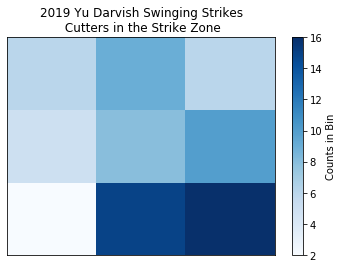

In [186]:
#plot darvish swing and misses for cutters on a 2D histogram in 2019
plt.hist2d(x = darvish_ss_fc_analysis19['zone_x'], y=darvish_ss_fc_analysis19['zone_y'], bins = 3, cmap='Blues')
plt.title('2019 Yu Darvish Swinging Strikes\n Cutters in the Strike Zone')
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
cb = plt.colorbar()
cb.set_label('Counts in Bin')
plt.savefig('Images/YU_SwingStrikesFC_19.png')

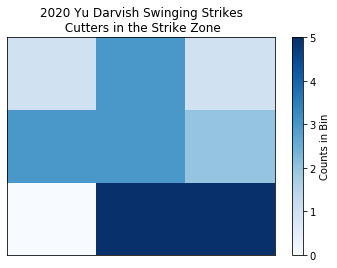

In [187]:
#plot darvish swing and misses for cutters on a 2D histogram in 2020
plt.hist2d(x = darvish_ss_fc_analysis20['zone_x'], y=darvish_ss_fc_analysis20['zone_y'], bins = 3, cmap='Blues')
plt.title('2020 Yu Darvish Swinging Strikes\n Cutters in the Strike Zone')
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
cb = plt.colorbar()
cb.set_label('Counts in Bin')
plt.savefig('Images/YU_SwingStrikesFC_20.png')

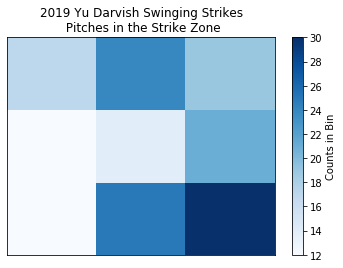

In [188]:
#plot darvish swing and misses for all pitches on a 2D histogram in 2019
plt.hist2d(x = darvish_strikezone_misses19['zone_x'], y=darvish_strikezone_misses19['zone_y'], bins = 3, cmap='Blues')
plt.title('2019 Yu Darvish Swinging Strikes\n Pitches in the Strike Zone')
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
cb = plt.colorbar()
cb.set_label('Counts in Bin')
plt.savefig('Images/YU_SwingStrikes_19.png')

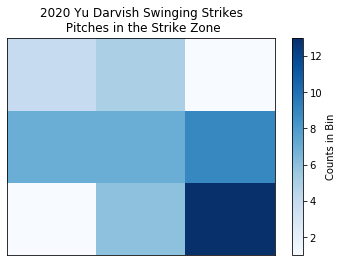

In [189]:
#plot darvish swing and misses for all pitches on a 2D histogram in 2020 YTD 9/8/20
plt.hist2d(x = darvish_strikezone_misses20['zone_x'], y=darvish_strikezone_misses20['zone_y'], bins = 3, cmap='Blues')
plt.title('2020 Yu Darvish Swinging Strikes\n Pitches in the Strike Zone')
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
cb = plt.colorbar()
cb.set_label('Counts in Bin')
plt.savefig('Images/YU_SwingStrikes_20.png')

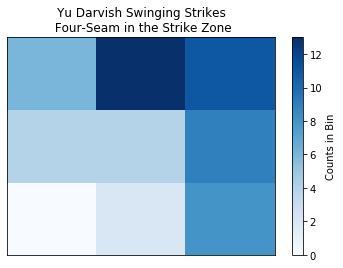

In [190]:
#plot darvish swing and misses for cutters on a 2D histogram
plt.hist2d(x = darvish_ss_ff_analysis['zone_x'], y=darvish_ss_ff_analysis['zone_y'], bins = 3, cmap='Blues')
plt.title('Yu Darvish Swinging Strikes\n Four-Seam in the Strike Zone')
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
cb = plt.colorbar()
cb.set_label('Counts in Bin')
plt.savefig('Images/YU_SwingStrikesFF_19.png')

In [34]:
#lets pull out data related to pitcher
pitcher_columns = ['pitch_type','pitch_name', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'events',
       'description', 'zone', 'p_throws', 'type',
       'hit_location', 'bb_type', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z','vx0', 'vy0', 'vz0',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'pitcher.1', 'release_pos_y',
       'estimated_ba_using_speedangle', 'estimated_woba_using_speedangle',
       'woba_value', 'woba_denom', 'babip_value', 'iso_value']

In [ ]:
darvish_ss_ff_analysis

In [ ]:
statcast_pitch = pd.DataFrame(statcast_df[pitcher_columns])

In [ ]:
statcast_pitch.head(10)

In [ ]:
#group data pitcher and pitch type
new_columns = ['release_speed', 'pfx_x','pfx_z',"release_spin_rate",'estimated_woba_using_speedangle','woba_value','player_name','pitch_name']
statcast_bypitcher = statcast_pitch[new_columns].groupby(["player_name","pitch_name"]).mean()

In [ ]:
statcast_bypitcher.head(40)